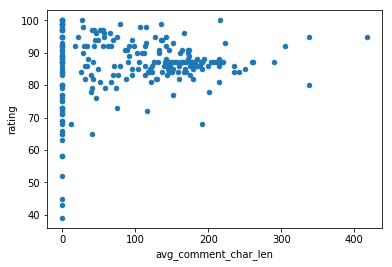

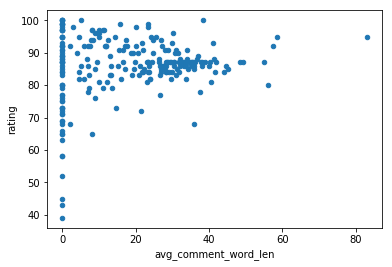

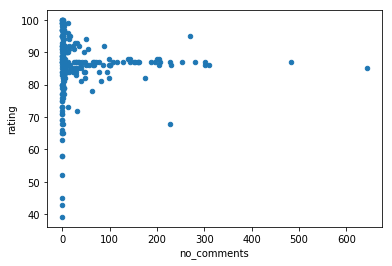

In [54]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pickle
%matplotlib inline

drama_df = pd.read_csv("./dramas.csv")
drama_df["comments"].fillna(" ", inplace=True)
comments_df = drama_df[["comments",
     "avg_comment_char_len",
     "avg_comment_word_len",
     "no_comments",
     "rating"]].dropna()

pickle.dump(comments_df, open("comments_df.pkl", "wb"))
comments_df.plot.scatter(x="avg_comment_char_len", y="rating")
comments_df.plot.scatter(x="avg_comment_word_len", y="rating")
comments_df.plot.scatter(x="no_comments", y="rating")

In [11]:
drama_df[["Language", "rating"]].groupby("Language").rating.mean()

Language
Japanese    85.820144
Korean      86.090000
Name: rating, dtype: float64

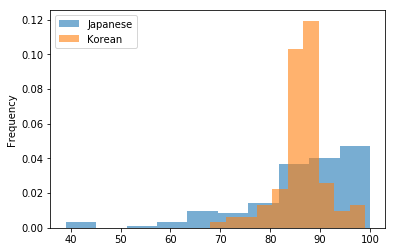

In [12]:
for each in drama_df[["Language", "rating"]].groupby("Language").Language:
    (drama_df[drama_df.Language == each[0]]["rating"]
     .plot.hist(legend=True, label=each[0], alpha=0.6, density=True))

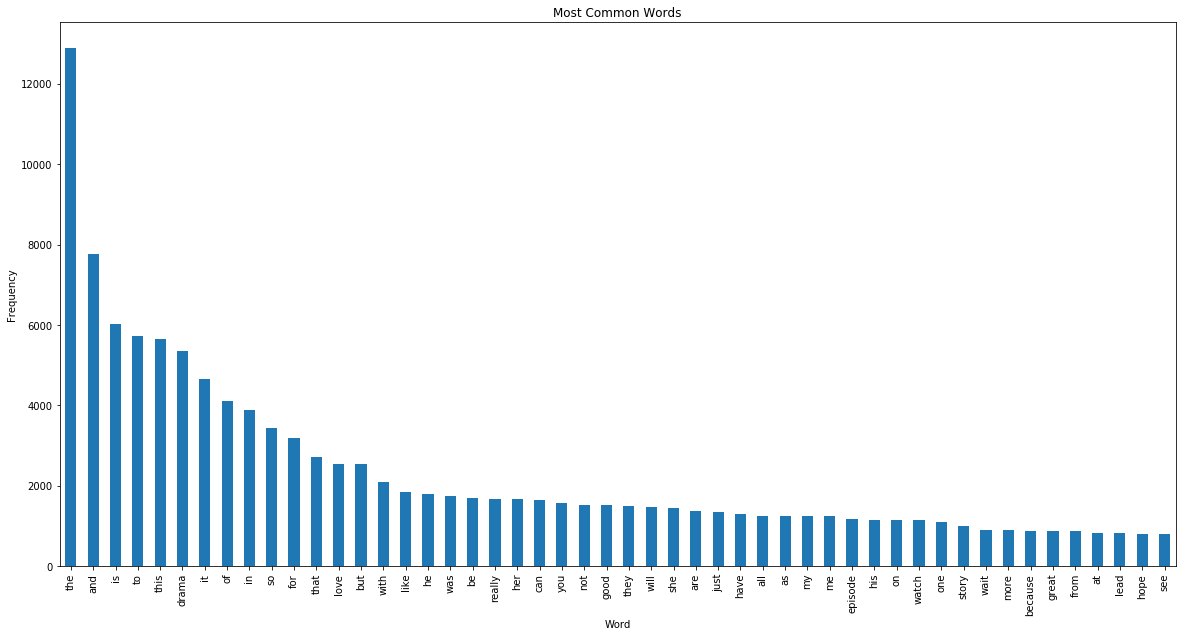

In [51]:
total_words = 50
comments = drama_df["comments"].loc[drama_df["rating"].dropna().index]
vec = CountVectorizer(max_features=total_words)
vec.fit(comments)
comments_arr = vec.transform(comments).toarray()
comment_vectorized = pd.DataFrame(comments_arr)
for x in vec.vocabulary_.items():
    comment_vectorized = comment_vectorized.rename(index=str, columns={x[1] : x[0]})

plt.figure(figsize=(20,10))
plt.title("Most Common Words")
plt.xlabel("Word")
plt.ylabel("Frequency")
pickle.dump(comment_vectorized.sum(axis=0).sort_values(ascending=False), open("graphngram1.pkl", "wb"))
comment_vectorized.sum(axis=0).sort_values(ascending=False).plot.bar()

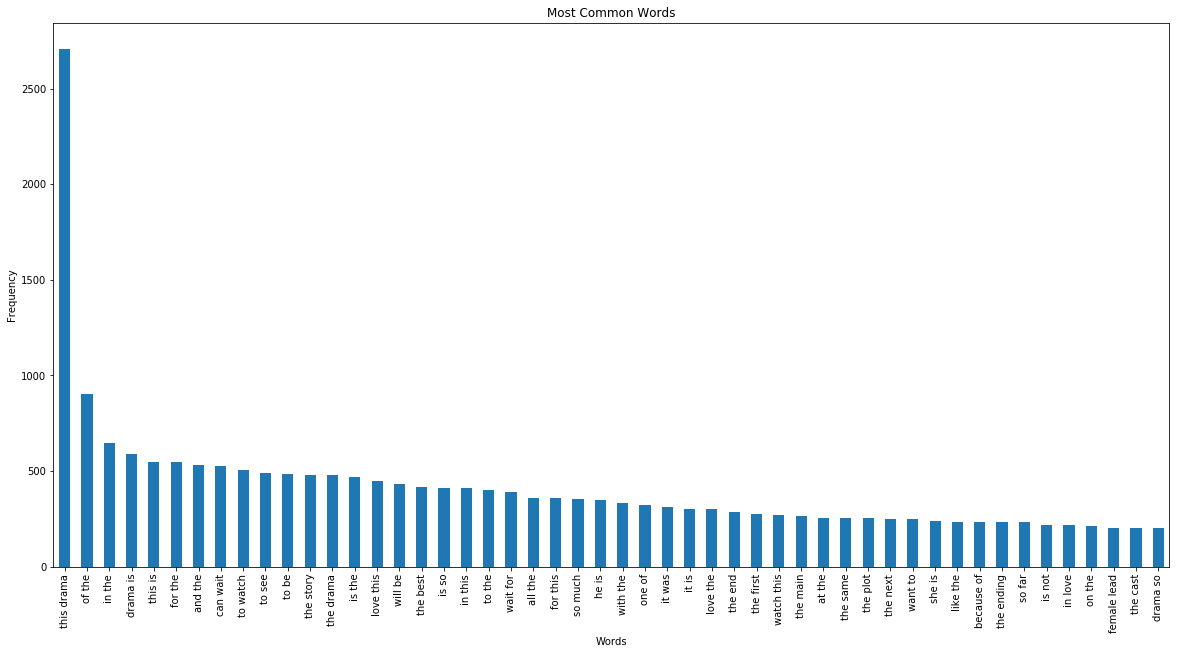

In [52]:
vec = CountVectorizer(max_features=total_words, ngram_range=(2, 2))
vec.fit(comments)
comments_arr = vec.transform(comments).toarray()
comment_vectorized = pd.DataFrame(comments_arr)
for x in vec.vocabulary_.items():
    comment_vectorized = comment_vectorized.rename(index=str, columns={x[1] : x[0]})
plt.figure(figsize=(20,10))
plt.title("Most Common Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
pickle.dump(comment_vectorized.sum(axis=0).sort_values(ascending=False), open("graphngram2.pkl", "wb"))
comment_vectorized.sum(axis=0).sort_values(ascending=False).plot.bar()

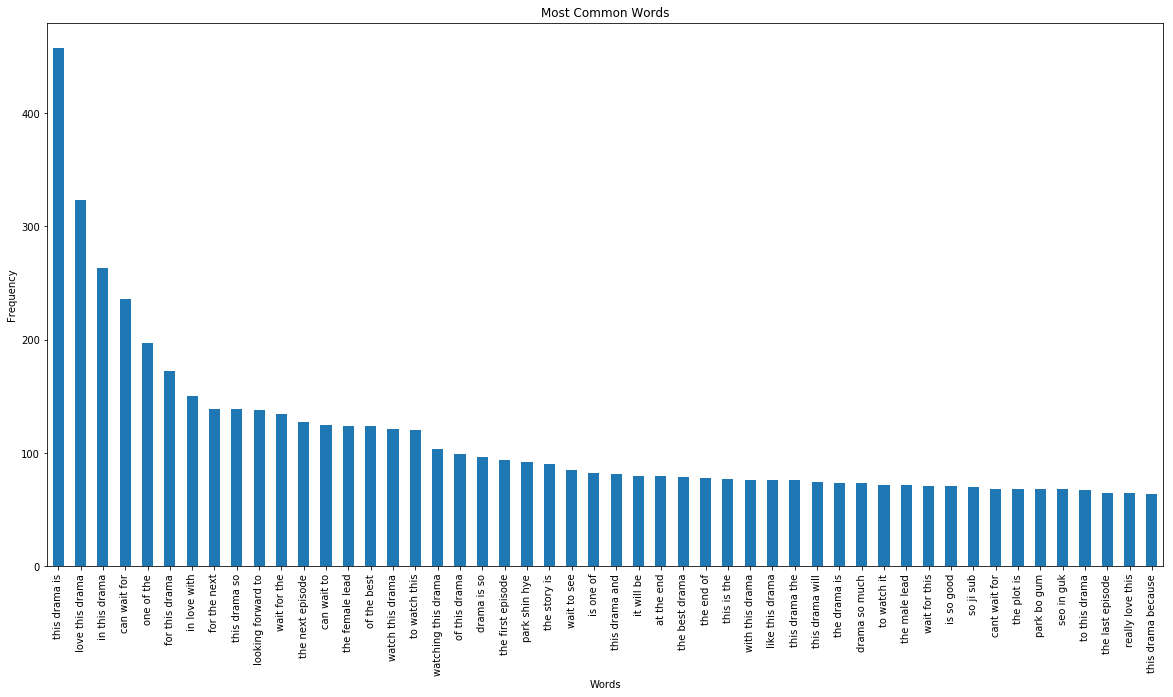

In [53]:
vec = CountVectorizer(max_features=total_words, ngram_range=(3, 3))
vec.fit(comments)
comments_arr = vec.transform(comments).toarray()
comment_vectorized = pd.DataFrame(comments_arr)
for x in vec.vocabulary_.items():
    comment_vectorized = comment_vectorized.rename(index=str, columns={x[1] : x[0]})
plt.figure(figsize=(20,10))
plt.title("Most Common Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
pickle.dump(comment_vectorized.sum(axis=0).sort_values(ascending=False), open("graphngram3.pkl", "wb"))
comment_vectorized.sum(axis=0).sort_values(ascending=False).plot.bar()